In [1]:
import pandas as pd
import numpy as np 
teams = {}

def createDict():
    teams["Atlanta Hawks"] = "ATL"
    teams["Brooklyn Nets"] = "BRK"
    teams["Boston Celtics"] = "BOS"
    teams["Charlotte Hornets"] = "CHO"
    teams["Chicago Bulls"] = "CHI"
    teams["Cleveland Cavaliers"] = "CLE"
    teams["Dallas Mavericks"] = "DAL"
    teams["Denver Nuggets"] = "DEN"
    teams["Detroit Pistons"] = "DET"
    teams["Golden State Warriors"] = "GSW"
    teams["Houston Rockets"] = "HOU"
    teams["Indiana Pacers"] = "IND"
    teams["Los Angeles Clippers"] = "LAC"
    teams["Los Angeles Lakers"] = "LAL"
    teams["Memphis Grizzlies"] = "MEM"
    teams["Miami Heat"] = "MIA"
    teams["Milwaukee Bucks"] = "MIL"
    teams["Minnesota Timberwolves"] = "MIN"
    teams["New Orleans Pelicans"] = "NOP"
    teams["New York Knicks"] = "NYK"
    teams["Oklahoma City Thunder"] = "OKC"
    teams["Orlando Magic"] = "ORL"
    teams["Philadelphia 76ers"] = "PHI"
    teams["Phoenix Suns"] = "PHO"
    teams["Portland Trail Blazers"] = "POR"
    teams["Sacramento Kings"] = "SAC"
    teams["San Antonio Spurs"] = "SAS"
    teams["Toronto Raptors"] = "TOR"
    teams["Utah Jazz"] = "UTA"
    teams["Washington Wizards"] = "WAS"
    teams["Charlotte Bobcats"] = "CHA"
    teams["New Orleans Hornets"] = "NOH"
    teams["New Jersey Nets"] = "NJN"

In [2]:
teamPGVars = ['teamPG09.csv', 'teamPG10.csv', 'teamPG11.csv' , 'teamPG12.csv', 'teamPG13.csv', 'teamPG14.csv', 'teamPG15.csv',  'teamPG16.csv', 'teamPG17.csv', 'teamPG18.csv']
teamVars = ['tstats09.csv', 'tstats10.csv', 'tstats11.csv', 'tstats12.csv', 'tstats13.csv', 'tstats14.csv', 'tstats15.csv', 'tstats16.csv', 'tstats17.csv', 'tstats18.csv']              
              
              

In [3]:
def inputData(stats, n): # n = 0 - team rankings, 1 - team per game stats
                        # 2 - opponent per game stats, 3 - misc stats
    createDict()
    counter = 0
    frames = []
    for item in stats:
        a = pd.read_csv(item)
        if n >= 0 and n <= 3:
            if n == 0:  #delete first row of team rankings dataframe
                a = a.iloc[1:, 0:5]        
                a.columns = ['Rk', 'Team', 'Conf', 'Div', 'W']
            if n >= 1 and n <= 3:
                if 'PTS\\' in a:
                    a['PTS'] = a['PTS\\']
                    a = a.drop(['PTS\\'], axis = 1)
                a = a[:30]
                a['Team'] = [s.replace('*', '') for s in a['Team']]
                a['PTS'] = a['PTS'].astype(str)
                a['PTS'] = [s.replace('\\', '') for s in a['PTS']]
                a['PTS'] = a['PTS'].astype(float)
            a['Tm'] = a.apply(lambda x: teams[str(x.Team)], axis = 1)
        a["TMYR"] = a.apply(lambda x: str(x.Tm) + str(counter), axis = 1)
        if n == 0:
            a = a[["TMYR", "W"]]
        #print(a)
        counter = counter + 1;
        frames.append(a)
    result = pd.concat(frames, sort = False)
    return result

teamPG = inputData(teamPGVars, 1)
teamPG.to_csv('TEST.csv')

FileNotFoundError: File b'teamPG09' does not exist

In [4]:
teamPGVars = ['teamPG09.csv', 'teamPG10.csv', 'teamPG11.csv' , 'teamPG12.csv', 'teamPG13.csv', 'teamPG14.csv', 'teamPG15.csv',  'teamPG16.csv', 'teamPG17.csv', 'teamPG18.csv']
teamVars = ['tstats09.csv', 'tstats10.csv', 'tstats11.csv', 'tstats12.csv', 'tstats13.csv', 'tstats14.csv', 'tstats15.csv', 'tstats16.csv', 'tstats17.csv', 'tstats18.csv']   

In [5]:
teamPG = inputData(teamPGVars, 1)
teamPG.to_csv('TEST.csv')

In [6]:
oTeamPG = ['oTeamPG09.csv', 'oTeamPG10.csv', 'oTeamPG11.csv', 'oTeamPG12.csv', 'oTeamPG13.csv' , 'oTeamPG14.csv' , 'oTeamPG15.csv' , 'oTeamPG16.csv', 'oTeamPG17.csv', 'oTeamPG18.csv']



In [7]:
oTeamPG = inputData(oTeamPG, 1)
oTeamPG.to_csv('TEST2.csv')

In [33]:
teamVars = ['tstats09.csv', 'tstats10.csv', 'tstats11.csv', 'tstats12.csv', 'tstats13.csv', 'tstats14.csv', 'tstats15.csv', 'tstats16.csv', 'tstats17.csv', 'tstats18.csv']
teams = inputData(teamVars, 0)


    Rk                    Team Conf Div   W
1    1     Cleveland Cavaliers    E   C  66
2    2          Boston Celtics    E   A  62
3    3      Los Angeles Lakers    W   P  65
4    4           Orlando Magic    E  SE  59
5    5  Portland Trail Blazers    W  NW  54
6    6         Houston Rockets    W  SW  53
7    7       San Antonio Spurs    W  SW  54
8    8          Denver Nuggets    W  NW  54
9    9               Utah Jazz    W  NW  48
10  10           Atlanta Hawks    E  SE  47
11  11        Dallas Mavericks    W  SW  50
12  12            Phoenix Suns    W   P  46
13  13     New Orleans Hornets    W  SW  49
14  14              Miami Heat    E  SE  43
15  15      Philadelphia 76ers    E   A  41
16  16           Chicago Bulls    E   C  41
17  17         Detroit Pistons    E   C  39
18  18          Indiana Pacers    E   C  36
19  19         Milwaukee Bucks    E   C  34
20  20       Charlotte Bobcats    E  SE  35
21  21         New York Knicks    E   A  32
22  22         New Jersey Nets  

ValueError: Wrong number of items passed 300, placement implies 1

In [9]:
result = pd.merge(oTeamPG, teams, on = 'TMYR')

In [10]:
result['W'] = result['W'].astype(int)

In [11]:
result.corr()['W']

Rk            -0.573876
G              0.187037
MP             0.023232
FG            -0.367493
FGA            0.024917
FG%           -0.626600
3P            -0.108516
3PA           -0.017429
3P%           -0.443641
2P            -0.310693
2PA            0.040992
2P%           -0.508933
FT            -0.252965
FTA           -0.247857
FT%           -0.066689
ORB           -0.114798
DRB           -0.337346
TRB           -0.382374
AST           -0.461742
STL           -0.247872
BLK           -0.446813
TOV            0.052236
PF             0.206735
PTS           -0.400904
Unnamed: 25         NaN
Unnamed: 0    -0.488097
W              1.000000
Name: W, dtype: float64

In [12]:
%matplotlib inline

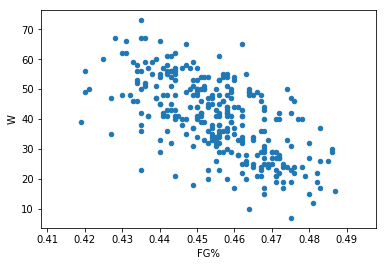

In [13]:
result.plot.scatter(x = 'FG%', y = 'W')

In [14]:
a = pd.read_csv('miscStats09.csv')

In [15]:
print(a)

   Unnamed: 0               Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4  \
0          Rk                     Team        Age          W          L   
1           1     Cleveland Cavaliers*       26.6         66         16   
2           2          Boston Celtics*       27.8         62         20   
3           3      Los Angeles Lakers*       27.4         65         17   
4           4           Orlando Magic*       27.3         59         23   
5           5  Portland Trail Blazers*         24         54         28   
6           6         Houston Rockets*       27.9         53         29   
7           7       San Antonio Spurs*       30.4         54         28   
8           8          Denver Nuggets*       27.7         54         28   
9           9               Utah Jazz*       25.5         48         34   
10         10           Atlanta Hawks*       25.8         47         35   
11         11        Dallas Mavericks*         29         50         32   
12         12            

In [16]:
def inputData(stats, n): # n = 0 - team rankings, 1 - team per game stats
                          # 2 - misc stats
    createDict()
    counter = 0
    frames = []
    for item in stats:
        a = pd.read_csv(item)
        if n >= 0 and n <= 2:
            if n == 0:  #delete first row of team rankings dataframe
                a = a.iloc[1:, 0:5]        
                a.columns = ['Rk', 'Team', 'Conf', 'Div', 'W']
            else if n == 1 or n == 2:
                if n == 2:
                    a = a[1:, 0:24]
                    a.columns = ['Rk', 'Team', 'Age', 'W', 'L', 'PW', 'PL', 'MOV', 'SOS', 'SRS', 'ORtg', 'DRtg', 'Pace', 'FTr', '3PAr', 'TS%', 'eFG%', 'TOV%', 'ORB%', 'FT/FGA', 'oeFG%' ,'oTOV%', 'DRB%', 'oFT/FGA']
                else:
                    if 'PTS\\' in a:
                        a['PTS'] = a['PTS\\']
                        a = a.drop(['PTS\\'], axis = 1)
                    a = a[:30]
                    a['PTS'] = a['PTS'].astype(str)
                    a['PTS'] = [s.replace('\\', '') for s in a['PTS']]
                    a['PTS'] = a['PTS'].astype(float)
                    
                a['Team'] = [s.replace('*', '') for s in a['Team']]
            a['Tm'] = a.apply(lambda x: teams[str(x.Team)], axis = 1)
        a["TMYR"] = a.apply(lambda x: str(x.Tm) + str(counter), axis = 1)
        if n == 0:
            a = a[["TMYR", "W"]]
        print(a)
        counter = counter + 1;
        frames.append(a)
    result = pd.concat(frames, sort = False)
    return result

SyntaxError: invalid syntax (<ipython-input-16-72904f7d9649>, line 12)

In [18]:
miscData = ['miscStats09.csv', 'miscStats10.csv', 'miscStats11.csv', 'miscStats12.csv', 'miscStats13.csv', 'miscStats14.csv', 'miscStats15.csv', 'miscStats16.csv', 'miscStats17.csv', 'miscStats18.csv']


In [19]:
misc = inputData(miscData, 2)

TypeError: unhashable type: 'slice'

In [20]:
def inputData(stats, n): # n = 0 - team rankings, 1 - team per game stats
                          # 2 - misc stats
    createDict()
    counter = 0
    frames = []
    for item in stats:
        a = pd.read_csv(item)
        if n >= 0 and n <= 2:
            if n == 0:  #delete first row of team rankings dataframe
                a = a.iloc[1:, 0:5]        
                a.columns = ['Rk', 'Team', 'Conf', 'Div', 'W']
            elif n == 1 or n == 2:
                if n == 2:
                    a = a.iloc[1:, 0:24]
                    a.columns = ['Rk', 'Team', 'Age', 'W', 'L', 'PW', 'PL', 'MOV', 'SOS', 'SRS', 'ORtg', 'DRtg', 'Pace', 'FTr', '3PAr', 'TS%', 'eFG%', 'TOV%', 'ORB%', 'FT/FGA', 'oeFG%' ,'oTOV%', 'DRB%', 'oFT/FGA']
                else:
                    if 'PTS\\' in a:
                        a['PTS'] = a['PTS\\']
                        a = a.drop(['PTS\\'], axis = 1)
                    a = a[:30]
                    a['PTS'] = a['PTS'].astype(str)
                    a['PTS'] = [s.replace('\\', '') for s in a['PTS']]
                    a['PTS'] = a['PTS'].astype(float)
                    
                a['Team'] = [s.replace('*', '') for s in a['Team']]
            a['Tm'] = a.apply(lambda x: teams[str(x.Team)], axis = 1)
        a["TMYR"] = a.apply(lambda x: str(x.Tm) + str(counter), axis = 1)
        if n == 0:
            a = a[["TMYR", "W"]]
        print(a)
        counter = counter + 1;
        frames.append(a)
    result = pd.concat(frames, sort = False)
    return result

In [21]:
misc = inputData(miscData, 2)
misc.to_csv('MISCDATA.csv')

AttributeError: 'float' object has no attribute 'replace'

In [36]:
def inputData(stats, n): # n = 0 - team rankings, 1 - team per game stats
                          # 2 - misc stats
    createDict()
    counter = 0
    frames = []
    for item in stats:
        a = pd.read_csv(item)
        if n >= 0 and n <= 2:
            if n == 0:  #delete first row of team rankings dataframe
                a = a.iloc[1:, 0:5]        
                a.columns = ['Rk', 'Team', 'Conf', 'Div', 'W']
            elif n == 1 or n == 2:
                if n == 2:
                    a = a.iloc[1:31, 0:24]
                    a.columns = ['Rk', 'Team', 'Age', 'W', 'L', 'PW', 'PL', 'MOV', 'SOS', 'SRS', 'ORtg', 'DRtg', 'Pace', 'FTr', '3PAr', 'TS%', 'eFG%', 'TOV%', 'ORB%', 'FT/FGA', 'oeFG%' ,'oTOV%', 'DRB%', 'oFT/FGA']
                else:
                    if 'PTS\\' in a:
                        a['PTS'] = a['PTS\\']
                        a = a.drop(['PTS\\'], axis = 1)
                    a = a[:30]
                    a['PTS'] = a['PTS'].astype(str)
                    a['PTS'] = [s.replace('\\', '') for s in a['PTS']]
                    a['PTS'] = a['PTS'].astype(float)
                    
                a['Team'] = [s.replace('*', '') for s in a['Team']]
            print(a)    
            a.to_csv('a.csv')
            a["Tm"] = a.apply(lambda x: teams[str(x.loc[:, "Team"])], axis = 1)
        a["TMYR"] = a.apply(lambda x: str(x.Tm) + str(counter), axis = 1)
        if n == 0:
            a = a[["TMYR", "W"]]
        print(a)
        counter = counter + 1;
        frames.append(a)
    result = pd.concat(frames, sort = False)
    return result

In [37]:
misc = inputData(miscData, 2)
misc.to_csv('MISCDATA.csv')

    Rk                    Team   Age   W   L  PW  PL    MOV    SOS    SRS  \
1    1     Cleveland Cavaliers  26.6  66  16  65  17   8.93  -0.25   8.68   
2    2          Boston Celtics  27.8  62  20  61  21   7.51  -0.07   7.44   
3    3      Los Angeles Lakers  27.4  65  17  61  21   7.66  -0.55   7.11   
4    4           Orlando Magic  27.3  59  23  59  23    6.7  -0.21   6.48   
5    5  Portland Trail Blazers    24  54  28  56  26   5.34  -0.35      5   
6    6         Houston Rockets  27.9  53  29  53  29      4  -0.27   3.73   
7    7       San Antonio Spurs  30.4  54  28  52  30   3.76   -0.4   3.36   
8    8          Denver Nuggets  27.7  54  28  50  32   3.41  -0.29   3.13   
9    9               Utah Jazz  25.5  48  34  48  34   2.65  -0.34   2.31   
10  10           Atlanta Hawks  25.8  47  35  46  36   1.57   0.13    1.7   
11  11        Dallas Mavericks    29  50  32  47  35   1.98   -0.3   1.68   
12  12            Phoenix Suns  29.5  46  36  46  36   1.93  -0.31   1.62   

IndexingError: ('Too many indexers', 'occurred at index 1')

In [38]:
def inputData(stats, n): # n = 0 - team rankings, 1 - team per game stats
                          # 2 - misc stats
    createDict()
    counter = 0
    frames = []
    for item in stats:
        a = pd.read_csv(item)
        if n >= 0 and n <= 2:
            if n == 0:  #delete first row of team rankings dataframe
                a = a.iloc[1:, 0:5]        
                a.columns = ['Rk', 'Team', 'Conf', 'Div', 'W']
            elif n == 1 or n == 2:
                if n == 2:
                    a = a.iloc[1:31, 0:24]
                    a.columns = ['Rk', 'Team', 'Age', 'W', 'L', 'PW', 'PL', 'MOV', 'SOS', 'SRS', 'ORtg', 'DRtg', 'Pace', 'FTr', '3PAr', 'TS%', 'eFG%', 'TOV%', 'ORB%', 'FT/FGA', 'oeFG%' ,'oTOV%', 'DRB%', 'oFT/FGA']
                else:
                    if 'PTS\\' in a:
                        a['PTS'] = a['PTS\\']
                        a = a.drop(['PTS\\'], axis = 1)
                    a = a[:30]
                    a['PTS'] = a['PTS'].astype(str)
                    a['PTS'] = [s.replace('\\', '') for s in a['PTS']]
                    a['PTS'] = a['PTS'].astype(float)
                    
                a['Team'] = [s.replace('*', '') for s in a['Team']]
            print(a)    
            a.to_csv('a.csv')
            a["Tm"] = a.apply(lambda x: teams[str(x.loc[:, "Team"])], axis = 1)
        a["TMYR"] = a.apply(lambda x: str(x.Tm) + str(counter), axis = 1)
        if n == 0:
            a = a[["TMYR", "W"]]
        print(a)
        counter = counter + 1;
        frames.append(a)
    result = pd.concat(frames, sort = False)
    return result

In [50]:
def inputData(stats, n): # n = 0 - team rankings, 1 - team per game stats
                          # 2 - misc stats
    createDict()
    counter = 0
    frames = []
    for item in stats:
        a = pd.read_csv(item)
        if n >= 0 and n <= 2:
            if n == 0:  #delete first row of team rankings dataframe
                a = a.iloc[1:, 0:5]        
                a.columns = ['Rk', 'Team', 'Conf', 'Div', 'W']
            elif n == 1 or n == 2:
                if n == 2:
                    a = a.iloc[1:31, 0:24]
                    a.columns = ['Rk', 'Team', 'Age', 'W', 'L', 'PW', 'PL', 'MOV', 'SOS', 'SRS', 'ORtg', 'DRtg', 'Pace', 'FTr', '3PAr', 'TS%', 'eFG%', 'TOV%', 'ORB%', 'FT/FGA', 'oeFG%' ,'oTOV%', 'DRB%', 'oFT/FGA']
                else:
                    if 'PTS\\' in a:
                        a['PTS'] = a['PTS\\']
                        a = a.drop(['PTS\\'], axis = 1)
                    a = a[:30]
                    a['PTS'] = a['PTS'].astype(str)
                    a['PTS'] = [s.replace('\\', '') for s in a['PTS']]
                    a['PTS'] = a['PTS'].astype(float)
                    
                a['Team'] = [s.replace('*', '') for s in a['Team']]
            print(a)    
            a.to_csv('a.csv')
            a["Tm"] = a.apply(lambda x: teams[str(x.Team)], axis = 1)
        a["TMYR"] = a.apply(lambda x: str(x.Tm) + str(counter), axis = 1)
        if n == 0:
            a = a[["TMYR", "W"]]
        print(a)
        counter = counter + 1;
        frames.append(a)
    result = pd.concat(frames, sort = False)
    return result

In [51]:
misc = inputData(miscData, 2)
misc.to_csv('MISCDATA.csv')

    Rk                    Team   Age   W   L  PW  PL    MOV    SOS    SRS  \
1    1     Cleveland Cavaliers  26.6  66  16  65  17   8.93  -0.25   8.68   
2    2          Boston Celtics  27.8  62  20  61  21   7.51  -0.07   7.44   
3    3      Los Angeles Lakers  27.4  65  17  61  21   7.66  -0.55   7.11   
4    4           Orlando Magic  27.3  59  23  59  23    6.7  -0.21   6.48   
5    5  Portland Trail Blazers    24  54  28  56  26   5.34  -0.35      5   
6    6         Houston Rockets  27.9  53  29  53  29      4  -0.27   3.73   
7    7       San Antonio Spurs  30.4  54  28  52  30   3.76   -0.4   3.36   
8    8          Denver Nuggets  27.7  54  28  50  32   3.41  -0.29   3.13   
9    9               Utah Jazz  25.5  48  34  48  34   2.65  -0.34   2.31   
10  10           Atlanta Hawks  25.8  47  35  46  36   1.57   0.13    1.7   
11  11        Dallas Mavericks    29  50  32  47  35   1.98   -0.3   1.68   
12  12            Phoenix Suns  29.5  46  36  46  36   1.93  -0.31   1.62   

ValueError: Wrong number of items passed 300, placement implies 1

In [52]:
teams

,TMYR,W,Atlanta Hawks,Brooklyn Nets,Boston Celtics,Charlotte Hornets,Chicago Bulls,Cleveland Cavaliers,Dallas Mavericks,Denver Nuggets,...,Phoenix Suns,Portland Trail Blazers,Sacramento Kings,San Antonio Spurs,Toronto Raptors,Utah Jazz,Washington Wizards,Charlotte Bobcats,New Orleans Hornets,New Jersey Nets
1,CLE0,66,ATL,BRK,BOS,CHO,CHI,CLE,DAL,DEN,...,PHO,POR,SAC,SAS,TOR,UTA,WAS,CHA,NOH,NJN
2,BOS0,62,ATL,BRK,BOS,CHO,CHI,CLE,DAL,DEN,...,PHO,POR,SAC,SAS,TOR,UTA,WAS,CHA,NOH,NJN
3,LAL0,65,ATL,BRK,BOS,CHO,CHI,CLE,DAL,DEN,...,PHO,POR,SAC,SAS,TOR,UTA,WAS,CHA,NOH,NJN
4,ORL0,59,ATL,BRK,BOS,CHO,CHI,CLE,DAL,DEN,...,PHO,POR,SAC,SAS,TOR,UTA,WAS,CHA,NOH,NJN
5,POR0,54,ATL,BRK,BOS,CHO,CHI,CLE,DAL,DEN,...,PHO,POR,SAC,SAS,TOR,UTA,WAS,CHA,NOH,NJN
6,HOU0,53,ATL,BRK,BOS,CHO,CHI,CLE,DAL,DEN,...,PHO,POR,SAC,SAS,TOR,UTA,WAS,CHA,NOH,NJN
7,SAS0,54,ATL,BRK,BOS,CHO,CHI,CLE,DAL,DEN,...,PHO,POR,SAC,SAS,TOR,UTA,WAS,CHA,NOH,NJN
8,DEN0,54,ATL,BRK,BOS,CHO,CHI,CLE,DAL,DEN,...,PHO,POR,SAC,SAS,TOR,UTA,WAS,CHA,NOH,NJN
9,UTA0,48,ATL,BRK,BOS,CHO,CHI,CLE,DAL,DEN,...,PHO,POR,SAC,SAS,TOR,UTA,WAS,CHA,NOH,NJN
10,ATL0,47,ATL,BRK,BOS,CHO,CHI,CLE,DAL,DEN,...,PHO,POR,SAC,SAS,TOR,UTA,WAS,CHA,NOH,NJN


In [53]:
testDict = {}

def createDict():
    testDict["Atlanta Hawks"] = "ATL"
    testDict["Brooklyn Nets"] = "BRK"
    testDict["Boston Celtics"] = "BOS"
    testDict["Charlotte Hornets"] = "CHO"
    testDict["Chicago Bulls"] = "CHI"
    testDict["Cleveland Cavaliers"] = "CLE"
    testDict["Dallas Mavericks"] = "DAL"
    testDict["Denver Nuggets"] = "DEN"
    testDict["Detroit Pistons"] = "DET"
    testDict["Golden State Warriors"] = "GSW"
    testDict["Houston Rockets"] = "HOU"
    testDict["Indiana Pacers"] = "IND"
    testDict["Los Angeles Clippers"] = "LAC"
    testDict["Los Angeles Lakers"] = "LAL"
    testDict["Memphis Grizzlies"] = "MEM"
    testDict["Miami Heat"] = "MIA"
    testDict["Milwaukee Bucks"] = "MIL"
    testDict["Minnesota Timberwolves"] = "MIN"
    testDict["New Orleans Pelicans"] = "NOP"
    testDict["New York Knicks"] = "NYK"
    testDict["Oklahoma City Thunder"] = "OKC"
    testDict["Orlando Magic"] = "ORL"
    testDict["Philadelphia 76ers"] = "PHI"
    testDict["Phoenix Suns"] = "PHO"
    testDict["Portland Trail Blazers"] = "POR"
    testDict["Sacramento Kings"] = "SAC"
    testDict["San Antonio Spurs"] = "SAS"
    testDict["Toronto Raptors"] = "TOR"
    testDict["Utah Jazz"] = "UTA"
    testDict["Washington Wizards"] = "WAS"
    testDict["Charlotte Bobcats"] = "CHA"
    testDict["New Orleans Hornets"] = "NOH"
    testDict["New Jersey Nets"] = "NJN"

In [54]:
def inputData(stats, n): # n = 0 - team rankings, 1 - team per game stats
                          # 2 - misc stats
    createDict()
    counter = 0
    frames = []
    for item in stats:
        a = pd.read_csv(item)
        if n >= 0 and n <= 2:
            if n == 0:  #delete first row of team rankings dataframe
                a = a.iloc[1:, 0:5]        
                a.columns = ['Rk', 'Team', 'Conf', 'Div', 'W']
            elif n == 1 or n == 2:
                if n == 2:
                    a = a.iloc[1:31, 0:24]
                    a.columns = ['Rk', 'Team', 'Age', 'W', 'L', 'PW', 'PL', 'MOV', 'SOS', 'SRS', 'ORtg', 'DRtg', 'Pace', 'FTr', '3PAr', 'TS%', 'eFG%', 'TOV%', 'ORB%', 'FT/FGA', 'oeFG%' ,'oTOV%', 'DRB%', 'oFT/FGA']
                else:
                    if 'PTS\\' in a:
                        a['PTS'] = a['PTS\\']
                        a = a.drop(['PTS\\'], axis = 1)
                    a = a[:30]
                    a['PTS'] = a['PTS'].astype(str)
                    a['PTS'] = [s.replace('\\', '') for s in a['PTS']]
                    a['PTS'] = a['PTS'].astype(float)
                    
                a['Team'] = [s.replace('*', '') for s in a['Team']]
            print(a)    
            a.to_csv('a.csv')
            a["Tm"] = a.apply(lambda x: testDict[str(x.Team)], axis = 1)
        a["TMYR"] = a.apply(lambda x: str(x.Tm) + str(counter), axis = 1)
        if n == 0:
            a = a[["TMYR", "W"]]
        print(a)
        counter = counter + 1;
        frames.append(a)
    result = pd.concat(frames, sort = False)
    
    return result

In [55]:
testDict

{}

In [56]:
def inputData(stats, n): # n = 0 - team rankings, 1 - team per game stats
                          # 2 - misc stats
    counter = 0
    frames = []
    for item in stats:
        a = pd.read_csv(item)
        if n >= 0 and n <= 2:
            if n == 0:  #delete first row of team rankings dataframe
                a = a.iloc[1:, 0:5]        
                a.columns = ['Rk', 'Team', 'Conf', 'Div', 'W']
            elif n == 1 or n == 2:
                if n == 2:
                    a = a.iloc[1:31, 0:24]
                    a.columns = ['Rk', 'Team', 'Age', 'W', 'L', 'PW', 'PL', 'MOV', 'SOS', 'SRS', 'ORtg', 'DRtg', 'Pace', 'FTr', '3PAr', 'TS%', 'eFG%', 'TOV%', 'ORB%', 'FT/FGA', 'oeFG%' ,'oTOV%', 'DRB%', 'oFT/FGA']
                else:
                    if 'PTS\\' in a:
                        a['PTS'] = a['PTS\\']
                        a = a.drop(['PTS\\'], axis = 1)
                    a = a[:30]
                    a['PTS'] = a['PTS'].astype(str)
                    a['PTS'] = [s.replace('\\', '') for s in a['PTS']]
                    a['PTS'] = a['PTS'].astype(float)
                    
                a['Team'] = [s.replace('*', '') for s in a['Team']]
            print(a)    
            a.to_csv('a.csv')
            a["Tm"] = a.apply(lambda x: testDict[str(x.Team)], axis = 1)
        a["TMYR"] = a.apply(lambda x: str(x.Tm) + str(counter), axis = 1)
        if n == 0:
            a = a[["TMYR", "W"]]
        print(a)
        counter = counter + 1;
        frames.append(a)
    result = pd.concat(frames, sort = False)
    return result

In [57]:
createDict()

In [58]:
misc = inputData(miscData, 2)
misc.to_csv('MISCDATA.csv')

    Rk                    Team   Age   W   L  PW  PL    MOV    SOS    SRS  \
1    1     Cleveland Cavaliers  26.6  66  16  65  17   8.93  -0.25   8.68   
2    2          Boston Celtics  27.8  62  20  61  21   7.51  -0.07   7.44   
3    3      Los Angeles Lakers  27.4  65  17  61  21   7.66  -0.55   7.11   
4    4           Orlando Magic  27.3  59  23  59  23    6.7  -0.21   6.48   
5    5  Portland Trail Blazers    24  54  28  56  26   5.34  -0.35      5   
6    6         Houston Rockets  27.9  53  29  53  29      4  -0.27   3.73   
7    7       San Antonio Spurs  30.4  54  28  52  30   3.76   -0.4   3.36   
8    8          Denver Nuggets  27.7  54  28  50  32   3.41  -0.29   3.13   
9    9               Utah Jazz  25.5  48  34  48  34   2.65  -0.34   2.31   
10  10           Atlanta Hawks  25.8  47  35  46  36   1.57   0.13    1.7   
11  11        Dallas Mavericks    29  50  32  47  35   1.98   -0.3   1.68   
12  12            Phoenix Suns  29.5  46  36  46  36   1.93  -0.31   1.62   

    Rk                    Team   Age   W   L  PW  PL     MOV    SOS     SRS  \
1    1           Chicago Bulls  27.1  50  16  51  15    8.18  -0.76    7.43   
2    2       San Antonio Spurs  27.5  50  16  48  18    7.17   0.11    7.28   
3    3   Oklahoma City Thunder  25.1  47  19  46  20    6.12   0.32    6.44   
4    4              Miami Heat  28.3  46  20  47  19    5.98  -0.27    5.72   
5    5      Philadelphia 76ers  24.9  35  31  43  23    4.24  -0.65    3.59   
6    6          Denver Nuggets  26.6  38  28  39  27    2.88   0.29    3.16   
7    7    Los Angeles Clippers  27.3  40  26  39  27    2.56   0.26    2.82   
8    8           Atlanta Hawks  27.9  40  26  41  25    3.44  -0.77    2.67   
9    9          Indiana Pacers  26.3  42  24  41  25     3.3  -0.71     2.6   
10  10       Memphis Grizzlies  25.6  41  25  38  28    2.02   0.42    2.43   
11  11         New York Knicks  26.3  36  30  41  25     3.2  -0.81    2.39   
12  12          Boston Celtics  29.3  39  27  39  27

    Rk                    Team   Age   W   L  PW  PL    MOV    SOS    SRS  \
1    1   Golden State Warriors  28.2  67  15  67  15  11.63  -0.28  11.35   
2    2       San Antonio Spurs  29.6  61  21  60  22    7.2  -0.06   7.13   
3    3         Houston Rockets  27.4  55  27  55  27   5.77   0.08   5.84   
4    4    Los Angeles Clippers    30  51  31  52  30   4.29   0.13   4.42   
5    5               Utah Jazz  26.8  51  31  52  30   3.94   0.06      4   
6    6         Toronto Raptors  26.1  51  31  52  30   4.21  -0.56   3.65   
7    7     Cleveland Cavaliers  29.2  51  31  49  33   3.18  -0.31   2.87   
8    8          Boston Celtics  25.9  53  29  48  34   2.63  -0.39   2.25   
9    9      Washington Wizards    26  49  33  46  36    1.8  -0.45   1.36   
10  10   Oklahoma City Thunder  24.7  47  35  43  39   0.76   0.39   1.14   
11  11       Memphis Grizzlies  29.5  43  39  42  40   0.49   0.47   0.96   
12  12              Miami Heat  26.5  41  41  44  38   1.06  -0.29   0.77   

In [59]:
misc.corr()['W']

KeyError: 'W'

In [60]:
testDict

{'Atlanta Hawks': 'ATL',
 'Brooklyn Nets': 'BRK',
 'Boston Celtics': 'BOS',
 'Charlotte Hornets': 'CHO',
 'Chicago Bulls': 'CHI',
 'Cleveland Cavaliers': 'CLE',
 'Dallas Mavericks': 'DAL',
 'Denver Nuggets': 'DEN',
 'Detroit Pistons': 'DET',
 'Golden State Warriors': 'GSW',
 'Houston Rockets': 'HOU',
 'Indiana Pacers': 'IND',
 'Los Angeles Clippers': 'LAC',
 'Los Angeles Lakers': 'LAL',
 'Memphis Grizzlies': 'MEM',
 'Miami Heat': 'MIA',
 'Milwaukee Bucks': 'MIL',
 'Minnesota Timberwolves': 'MIN',
 'New Orleans Pelicans': 'NOP',
 'New York Knicks': 'NYK',
 'Oklahoma City Thunder': 'OKC',
 'Orlando Magic': 'ORL',
 'Philadelphia 76ers': 'PHI',
 'Phoenix Suns': 'PHO',
 'Portland Trail Blazers': 'POR',
 'Sacramento Kings': 'SAC',
 'San Antonio Spurs': 'SAS',
 'Toronto Raptors': 'TOR',
 'Utah Jazz': 'UTA',
 'Washington Wizards': 'WAS',
 'Charlotte Bobcats': 'CHA',
 'New Orleans Hornets': 'NOH',
 'New Jersey Nets': 'NJN'}

In [61]:
full['W'] = full['W'].astype(int)

NameError: name 'full' is not defined

In [62]:
misc['W'] = misc['W'].astype(int)

In [63]:
misc.corr()['W']

W    1.0
Name: W, dtype: float64

In [64]:
for col in misc.columns:
    if misc.col != 'Rk' or misc.col != 'Team' or misc.col != 'Tm' or misc.col != 'TMYR':
        misc.col = misc.col.astype(float)

AttributeError: 'DataFrame' object has no attribute 'col'

In [65]:
for col in misc.columns:
    if misc[col] != 'Rk' or misc[col] != 'Team' or misc[col] != 'Tm' or misc[col] != 'TMYR':
        misc[col] = misc[col]astype(float)

SyntaxError: invalid syntax (<ipython-input-65-5aaf151bf260>, line 3)

In [66]:
for col in misc.columns:
    if misc[col] != 'Rk' or misc[col] != 'Team' or misc[col] != 'Tm' or misc[col] != 'TMYR':
        misc[col] = misc[col].astype(float)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [67]:
for col in misc.columns:
    if col != 'Rk' and col != 'Team' and col != 'Tm'and col != 'TMYR':
        misc[col] = misc[col].astype(float)

In [68]:
misc.corr()['W']

Age        0.516189
W          1.000000
L         -0.929681
PW         0.973977
PL        -0.899174
MOV        0.952489
SOS       -0.346935
SRS        0.948818
ORtg       0.763187
DRtg      -0.618764
Pace      -0.039514
FTr        0.196396
3PAr       0.261407
TS%        0.710126
eFG%       0.688776
TOV%      -0.242453
ORB%      -0.009574
FT/FGA     0.238280
oeFG%     -0.545330
oTOV%      0.070021
DRB%       0.274810
oFT/FGA   -0.232267
Name: W, dtype: float64

In [69]:
testDict

{'Atlanta Hawks': 'ATL',
 'Brooklyn Nets': 'BRK',
 'Boston Celtics': 'BOS',
 'Charlotte Hornets': 'CHO',
 'Chicago Bulls': 'CHI',
 'Cleveland Cavaliers': 'CLE',
 'Dallas Mavericks': 'DAL',
 'Denver Nuggets': 'DEN',
 'Detroit Pistons': 'DET',
 'Golden State Warriors': 'GSW',
 'Houston Rockets': 'HOU',
 'Indiana Pacers': 'IND',
 'Los Angeles Clippers': 'LAC',
 'Los Angeles Lakers': 'LAL',
 'Memphis Grizzlies': 'MEM',
 'Miami Heat': 'MIA',
 'Milwaukee Bucks': 'MIL',
 'Minnesota Timberwolves': 'MIN',
 'New Orleans Pelicans': 'NOP',
 'New York Knicks': 'NYK',
 'Oklahoma City Thunder': 'OKC',
 'Orlando Magic': 'ORL',
 'Philadelphia 76ers': 'PHI',
 'Phoenix Suns': 'PHO',
 'Portland Trail Blazers': 'POR',
 'Sacramento Kings': 'SAC',
 'San Antonio Spurs': 'SAS',
 'Toronto Raptors': 'TOR',
 'Utah Jazz': 'UTA',
 'Washington Wizards': 'WAS',
 'Charlotte Bobcats': 'CHA',
 'New Orleans Hornets': 'NOH',
 'New Jersey Nets': 'NJN'}

In [70]:
misc.to_csv('MISC.csv')

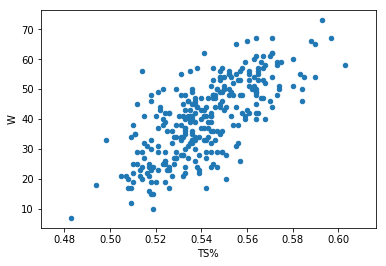

In [71]:
misc.plot.scatter(x = 'TS%', y = 'W')

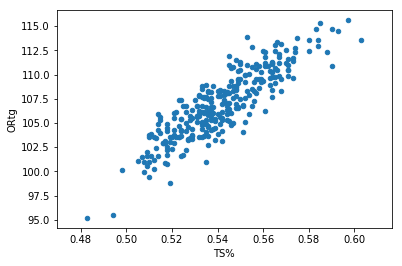

In [72]:
misc.plot.scatter(x = 'TS%', y = 'ORtg')

In [73]:
misc.corr()['ORting']['TS%', 'eFG%', '3PAr']

KeyError: 'ORting'

In [74]:
misc.corr()['ORtng']['TS%', 'eFG%', '3PAr'].plot.bar()

KeyError: 'ORtng'

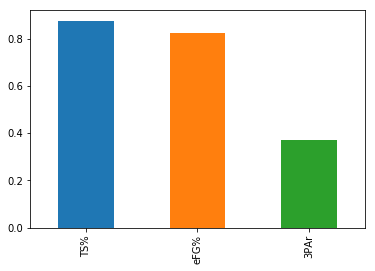

In [77]:
misc.corr()['ORtg'][['TS%', 'eFG%', '3PAr']].plot.bar()

In [78]:
teams = inputData(teamVars, 0)

    Rk                    Team Conf Div   W
1    1     Cleveland Cavaliers    E   C  66
2    2          Boston Celtics    E   A  62
3    3      Los Angeles Lakers    W   P  65
4    4           Orlando Magic    E  SE  59
5    5  Portland Trail Blazers    W  NW  54
6    6         Houston Rockets    W  SW  53
7    7       San Antonio Spurs    W  SW  54
8    8          Denver Nuggets    W  NW  54
9    9               Utah Jazz    W  NW  48
10  10           Atlanta Hawks    E  SE  47
11  11        Dallas Mavericks    W  SW  50
12  12            Phoenix Suns    W   P  46
13  13     New Orleans Hornets    W  SW  49
14  14              Miami Heat    E  SE  43
15  15      Philadelphia 76ers    E   A  41
16  16           Chicago Bulls    E   C  41
17  17         Detroit Pistons    E   C  39
18  18          Indiana Pacers    E   C  36
19  19         Milwaukee Bucks    E   C  34
20  20       Charlotte Bobcats    E  SE  35
21  21         New York Knicks    E   A  32
22  22         New Jersey Nets  

    TMYR   W
1   HOU9  65
2   TOR9  59
3   GSW9  58
4   UTA9  48
5   PHI9  52
6   OKC9  48
7   BOS9  55
8   SAS9  47
9   POR9  49
10  MIN9  47
11  DEN9  46
12  NOP9  48
13  IND9  48
14  CLE9  50
15  WAS9  43
16  MIA9  44
17  LAC9  42
18  CHO9  36
19  DET9  39
20  MIL9  44
21  LAL9  35
22  DAL9  24
23  NYK9  29
24  BRK9  28
25  ORL9  25
26  ATL9  24
27  MEM9  22
28  CHI9  27
29  SAC9  27
30  PHO9  21


In [79]:
print(teams)

    TMYR   W
1   CLE0  66
2   BOS0  62
3   LAL0  65
4   ORL0  59
5   POR0  54
6   HOU0  53
7   SAS0  54
8   DEN0  54
9   UTA0  48
10  ATL0  47
11  DAL0  50
12  PHO0  46
13  NOH0  49
14  MIA0  43
15  PHI0  41
16  CHI0  41
17  DET0  39
18  IND0  36
19  MIL0  34
20  CHA0  35
21  NYK0  32
22  NJN0  34
23  TOR0  33
24  GSW0  29
25  MIN0  24
26  MEM0  24
27  OKC0  23
28  WAS0  19
29  SAC0  17
30  LAC0  19
..   ...  ..
1   HOU9  65
2   TOR9  59
3   GSW9  58
4   UTA9  48
5   PHI9  52
6   OKC9  48
7   BOS9  55
8   SAS9  47
9   POR9  49
10  MIN9  47
11  DEN9  46
12  NOP9  48
13  IND9  48
14  CLE9  50
15  WAS9  43
16  MIA9  44
17  LAC9  42
18  CHO9  36
19  DET9  39
20  MIL9  44
21  LAL9  35
22  DAL9  24
23  NYK9  29
24  BRK9  28
25  ORL9  25
26  ATL9  24
27  MEM9  22
28  CHI9  27
29  SAC9  27
30  PHO9  21

[300 rows x 2 columns]


In [80]:
teams["cleve"] = 'test'

In [81]:
teams


,TMYR,W,cleve
1,CLE0,66,test
2,BOS0,62,test
3,LAL0,65,test
4,ORL0,59,test
5,POR0,54,test
6,HOU0,53,test
7,SAS0,54,test
8,DEN0,54,test
9,UTA0,48,test
10,ATL0,47,test


In [82]:
teams = inputData(teamVars, 0)

    Rk                    Team Conf Div   W
1    1     Cleveland Cavaliers    E   C  66
2    2          Boston Celtics    E   A  62
3    3      Los Angeles Lakers    W   P  65
4    4           Orlando Magic    E  SE  59
5    5  Portland Trail Blazers    W  NW  54
6    6         Houston Rockets    W  SW  53
7    7       San Antonio Spurs    W  SW  54
8    8          Denver Nuggets    W  NW  54
9    9               Utah Jazz    W  NW  48
10  10           Atlanta Hawks    E  SE  47
11  11        Dallas Mavericks    W  SW  50
12  12            Phoenix Suns    W   P  46
13  13     New Orleans Hornets    W  SW  49
14  14              Miami Heat    E  SE  43
15  15      Philadelphia 76ers    E   A  41
16  16           Chicago Bulls    E   C  41
17  17         Detroit Pistons    E   C  39
18  18          Indiana Pacers    E   C  36
19  19         Milwaukee Bucks    E   C  34
20  20       Charlotte Bobcats    E  SE  35
21  21         New York Knicks    E   A  32
22  22         New Jersey Nets  

    TMYR   W
1   OKC4  60
2   MIA4  66
3   SAS4  58
4   LAC4  56
5   DEN4  57
6   MEM4  56
7   NYK4  54
8   HOU4  45
9   IND4  49
10  LAL4  45
11  GSW4  47
12  BRK4  49
13  UTA4  43
14  CHI4  45
15  DAL4  41
16  ATL4  44
17  BOS4  41
18  TOR4  34
19  MIN4  31
20  MIL4  38
21  POR4  33
22  WAS4  29
23  NOH4  27
24  PHI4  34
25  SAC4  28
26  DET4  29
27  CLE4  24
28  PHO4  25
29  ORL4  20
30  CHA4  21
    Rk                    Team Conf Div   W
1    1       San Antonio Spurs    W  SW  62
2    2    Los Angeles Clippers    W   P  57
3    3   Oklahoma City Thunder    W  NW  59
4    4   Golden State Warriors    W   P  51
5    5         Houston Rockets    W  SW  54
6    6              Miami Heat    E  SE  54
7    7  Portland Trail Blazers    W  NW  54
8    8          Indiana Pacers    E   C  56
9    9        Dallas Mavericks    W  SW  49
10  10  Minnesota Timberwolves    W  NW  40
11  11            Phoenix Suns    W   P  48
12  12         Toronto Raptors    E   A  48
13  13       Memphis Griz

In [83]:
teams

,TMYR,W
1,CLE0,66
2,BOS0,62
3,LAL0,65
4,ORL0,59
5,POR0,54
6,HOU0,53
7,SAS0,54
8,DEN0,54
9,UTA0,48
10,ATL0,47
